# Newton Integration Root Finding

In [97]:
import numpy as np
from scipy.optimize import newton
from polyrand import rootfinder as rf
import matplotlib.pyplot as plt
import importlib
%matplotlib inline

In [98]:
importlib.reload(rf)

<module 'polyrand.rootfinder' from '/home/derek/repos/polyrand/polyrand/rootfinder.py'>

### Fractional Antiderivative

$\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k+a} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1+a} + \cdots + c_0 x^a + C$

$x^a (\frac{\Gamma(k)}{\Gamma(k+a)} c_k x^{k} + \frac{\Gamma(k-1)}{\Gamma(k-1+a)} c_{k-1} x^{k-1} + \cdots + c_0 x + C)$

$x^a (\sum_{i=0}^{k} \frac{\Gamma(k-i)}{\Gamma(k-i+a)} c_{k-i} x^{k-i} + C)$

Let $G_{k,a} = \frac{\Gamma(k)}{\Gamma(k+a)}$, then 

$x^a (\sum_{i=0}^{k} G_{k-i,a} c_{k-i} x^{k-i} + C)$

**Newton Integration**

1) Get coefficients of the polynomial to be solved.

2) Differentiate down to a polynomial $d^np$ whose roots are known.

3) Find the fractional antiderivative $d^{n+a}p$ where $a \in (0,1]$.

4) Find the roots of $d^{n+a}p$ using newton's method with the roots of $d^np$ as the guess.

5) Update roots by repeating steps 3 and 4.

computational complexity

$ c = count(k-a>0)$

gamma eval is constant

QR is $4/3 c^3$

$ c = count(k-a>0)$



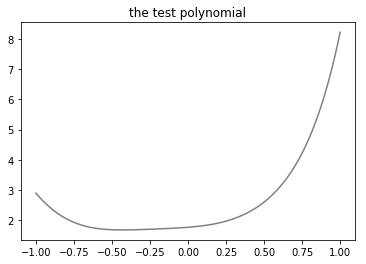

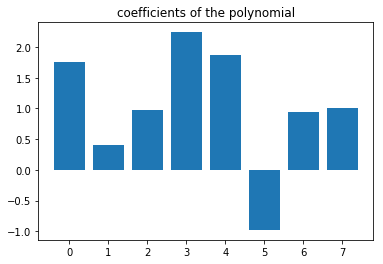

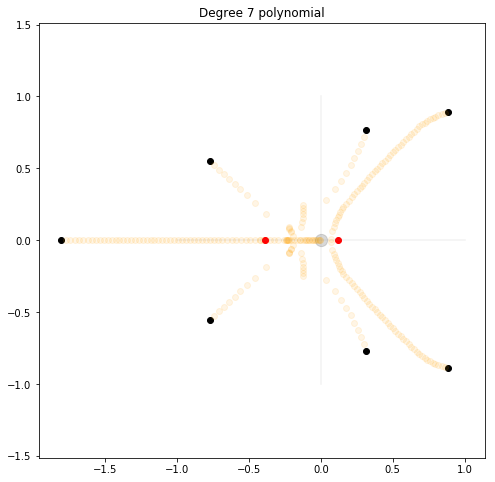

In [99]:
# test case
np.random.seed(0)
coeffs = np.random.randn(8)
coeffs[-1] = 1.
P = np.polynomial.polynomial.Polynomial(coeffs)
x = np.linspace(-1,1,101)

plt.plot(x,P(x),color='grey')
plt.title("the test polynomial")
plt.show()

plt.bar(np.arange(len(coeffs)),coeffs)
plt.title("coefficients of the polynomial")
plt.show()

rf.timelapse(coeffs,0,5,n_frames=50)

In [106]:
def newton_integration_x(coeffs,dx,stepsize,niters=5):
    """
    NIRF (Integration)
    NIRF (Newton Integration Root Finding)
    Use newton's method to integrate the roots of a polynomial up to a different polynomial.
    
    """
    # plot the solution we hope to get to
    plt.figure(figsize=(8,8))
    R = np.polynomial.polynomial.Polynomial(coeffs).roots()
    plt.scatter(R.real,R.imag,color='k',alpha=.5)
    
    # degree of polynomial
    d = len(coeffs) - 1
    
    # Find known roots of a derivative
    D = rf.frac_deriv(coeffs,dx)
    Roots = np.linalg.eig(D)[0]
    plt.scatter(Roots.real,Roots.imag,color='r',label="Derivative Roots")
    
    # loop here
    for i in range(niters):

        # define the function to optimize
        F_coeffs = rf.frac_deriv(coeffs,dx-i*stepsize,return_coeffs=True)
        P = np.polynomial.polynomial.Polynomial(F_coeffs)

        Z = []

        # Newton's method to find roots of function to optimize
        for r in Roots: # these are roots of P0
            
            # ignore negative complex region to save on flops

            f = lambda x: P(x)/x**(i*stepsize)
            z = newton(f,r)
            Z.append(z)
            plt.scatter(z.real,z.imag,color='orange',alpha=.2)


        Roots = np.array(Z)
    
    plt.scatter(Roots.real,Roots.imag,color='green',s=200,alpha=.7)
            
    plt.axis('equal')
    plt.legend()
    plt.show()

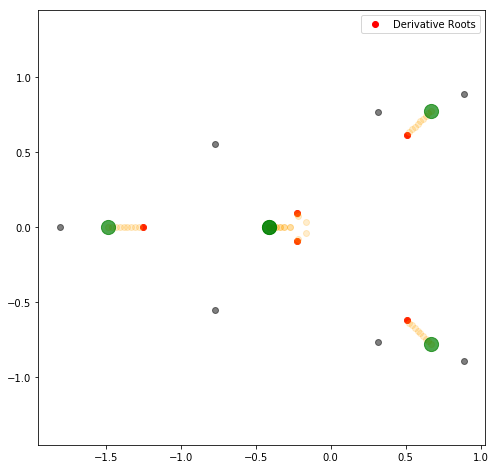

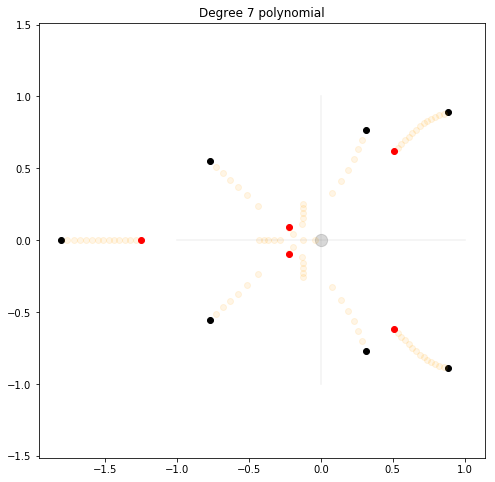

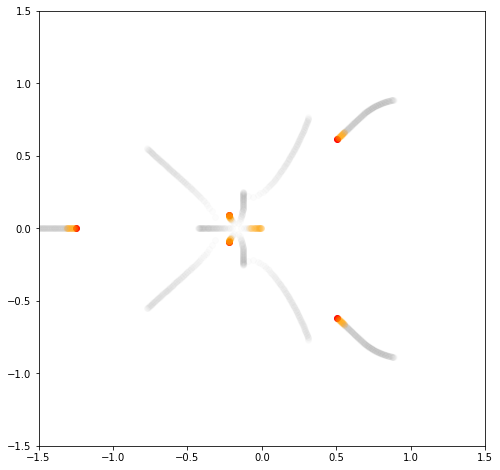

In [110]:
R = newton_integration_x(coeffs,2,.1,niters=10)
rf.timelapse(coeffs,0,2,n_frames=15)
rf.animate_roots(coeffs,0,2)